In [233]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from bokeh.plotting import figure
from bokeh.io import output_notebook, show



In [3]:
output_notebook()

Loading BokehJS ...

In [59]:
co2cities=pd.read_csv('/Users/kian/Documents/ChallangeQuestion_DI/CO2Emissions/SCRIPTS/\
DATA/ORIGINAL_EMISSIONS_SOURCEFILES/carbonn_selectedCities.tsv',delimiter='\t')

emi17=pd.read_csv('/Users/kian/Documents/ChallangeQuestion_DI/CO2Emissions/SCRIPTS/\
DATA/ORIGINAL_EMISSIONS_SOURCEFILES/\
2017_-_Cities_Community_Wide_Emissions_updatedDec2017_formatted.csv', delimiter=',')

emi16=pd.read_csv('/Users/kian/Documents/ChallangeQuestion_DI/CO2Emissions/SCRIPTS/\
DATA/ORIGINAL_EMISSIONS_SOURCEFILES/\
2016_-_Citywide_GHG_Emissions_updatedDec2017_formatted.csv' , delimiter=',')

In [74]:
co2cities.columns = [c.replace(' ', '_') for c in co2cities.columns]
emi17.columns = [c.replace(' ', '_') for c in emi17.columns]
emi17.columns = [c.replace('_(', '_') for c in emi17.columns]
emi17.columns = [c.replace('e)', '') for c in emi17.columns]
emi16.columns = [c.replace(' ', '_') for c in emi16.columns]

In [201]:
emi17.groupby('Region').Total_Scope_1_Emissions_metric_tonnes_CO2.sum()

Region
Africa                    4.245435e+07
East Asia                 2.225370e+08
Europe                    1.946266e+08
Latin America             1.643202e+08
North America             3.198499e+08
South Asia and Oceania    6.378103e+07
South and West Asia       4.946761e+06
Name: Total_Scope_1_Emissions_metric_tonnes_CO2, dtype: float64

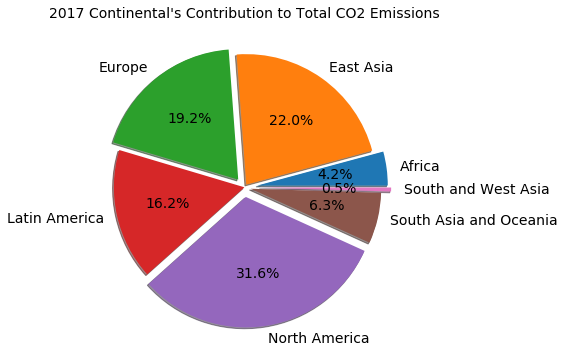

In [365]:
plt.axis("equal")

emi17.groupby('Region')\
.Total_Scope_1_Emissions_metric_tonnes_CO2.sum()\
.plot(kind='pie',autopct='%0.1f%%',radius=2,explode=[0.2,0.05,0.15,0,0.15,0.1,0.25]\
      ,shadow=True,fontsize=14.0)
plt.axis('off')
plt.title("2017 Continental's Contribution to Total CO2 Emissions",y=1.5,fontsize=14)

plt.savefig('totEmission17.pdf',type='pdf',dpi=300,bbox_inches='tight')
plt.show()



In [243]:
dchina=pd.read_csv('/Users/kian/Documents/ChallangeQuestion_DI/CO2Emissions/SCRIPTS/DATA\
/ORIGINAL_EMISSIONS_SOURCEFILES/china_prepared.tsv', delimiter = '\t')

dscity=pd.read_csv('/Users/kian/Documents/ChallangeQuestion_DI/CO2Emissions/SCRIPTS/DATA\
/ORIGINAL_EMISSIONS_SOURCEFILES/carbonn_selectedCities.tsv', delimiter = '\t')

dchina.columns = [c.replace(' ', '_') for c in dchina.columns]
dchina.columns = [c.replace('_(', '_') for c in dchina.columns]
dchina.columns = [c.replace(')', '') for c in dchina.columns]
dscity.columns = [c.replace(' ', '_') for c in dscity.columns]


In [370]:
correlation1=dchina.corr()

del correlation1['Unnamed:_0']
del correlation1['Year_of_Emission']
correlations=correlation1.drop(['Unnamed:_0','Year_of_Emission'])
#correlations

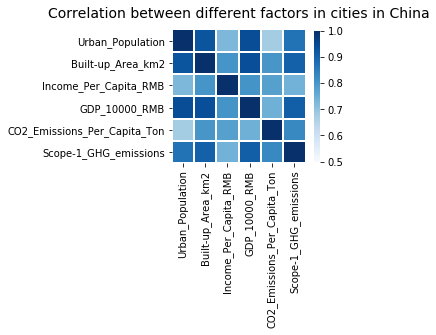

In [369]:
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,250, s=75, sep=80, l=55, n=9, center='dark', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(correlations, mask=mask, cmap="BuPu" , vmin=0.5, vmax=1, 
#            square=True, linewidths=.9, cbar_kws={"shrink": .5})
sns.heatmap(correlations, cmap="Blues", vmin=0.5, vmax=1, 
            square=True, linewidths=.9, cbar_kws={"shrink": .8})
plt.title("Correlation between different factors in cities in China",y=1.04,fontsize=14)
plt.savefig('corr.pdf', type='pdf', bbox_inches='tight')
plt.show()

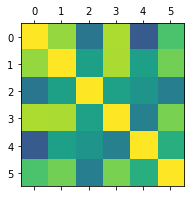

In [348]:

fig=plt.figure()

ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin=0.55,vmax=1)
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

plt.show()

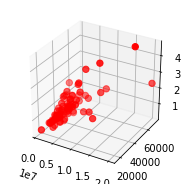

In [258]:
dpop=dchina.groupby(['city_name']).Urban_Population.mean()
dincome=dchina.groupby(['city_name']).Income_Per_Capita_RMB.mean()
dco2emi=dchina.groupby(['city_name']).CO2_Emissions_Per_Capita_Ton.mean()

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
X = dpop
Y = dincome
Z = dco2emi



ax.scatter(X, Y, Z, c='r', depthshade=True, s=40)
plt.show()

In [376]:
#co2cities.groupby('region').sum()

In [371]:
#(co2cities.groupby('region').most_recent_emissions.sum()\
# /co2cities.groupby('region').pop.sum()).plot(kind='pie')

In [372]:
#(co2cities.groupby('region').nGDP.sum()/co2cities.groupby('region').pop.sum()).plot(kind='pie')

In [373]:
#co2cities.groupby('region').nGDP.sum()/co2cities.groupby('region').pop.sum()

In [374]:
#co2cities.groupby('region').pop.sum()

In [375]:
#co2cities.groupby('region').nGDP.sum().plot(kind='bar')